# HW 1

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Step #1: Load and Explore Data

In [3]:
# GET THE FULL DATA SET FROM 
#https://drive.google.com/file/d/0B28c493CP9GtRHFVM0U0SVI2Yms/view?usp=sharing
nyc_cab_df = pd.read_csv('~/Downloads/nyc_car_hire_data.csv')

/var/folders/wq/mr3zj9r14dzgjnq9rjx_vqbc0000gn/T/ipykernel_20192/3758292361.py:3: DtypeWarning: Columns (1,18) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_cab_df = pd.read_csv('~/Downloads/nyc_car_hire_data.csv')


In [4]:
nyc_cab_df.shape

(1873671, 30)

In [5]:
nyc_cab_df.head()

,AWND,Base,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,...,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,lpep_pickup_datetime,Trip Length (min)
0,4.7,B02512,1,NaN,NaN,NaN,NaN,33.863498,2014-04-01 00:24:00,NaN,...,39,NaN,NaN,NaN,4.083561,NaN,1,NaN,2014-04-01 00:11:00,13.0
1,4.7,B02512,1,NaN,NaN,NaN,NaN,19.022892,2014-04-01 00:29:00,NaN,...,39,NaN,NaN,NaN,3.605694,NaN,1,NaN,2014-04-01 00:17:00,12.0
2,4.7,B02512,1,NaN,NaN,NaN,NaN,25.498981,2014-04-01 00:34:00,NaN,...,39,NaN,NaN,NaN,4.221763,NaN,1,NaN,2014-04-01 00:21:00,13.0
3,4.7,B02512,1,NaN,NaN,NaN,NaN,28.024628,2014-04-01 00:39:00,NaN,...,39,NaN,NaN,NaN,2.955510,NaN,1,NaN,2014-04-01 00:28:00,11.0
4,4.7,B02512,1,NaN,NaN,NaN,NaN,12.083589,2014-04-01 00:40:00,NaN,...,39,NaN,NaN,NaN,1.922292,NaN,1,NaN,2014-04-01 00:33:00,7.0


In [6]:
nyc_cab_df.dtypes

AWND                     float64
Base                      object
Day                        int64
Dropoff_latitude         float64
Dropoff_longitude        float64
Ehail_fee                float64
Extra                    float64
Fare_amount              float64
Lpep_dropoff_datetime     object
MTA_tax                  float64
PRCP                     float64
Passenger_count          float64
Payment_type             float64
Pickup_latitude          float64
Pickup_longitude         float64
RateCodeID               float64
SNOW                     float64
SNWD                     float64
Store_and_fwd_flag        object
TMAX                       int64
TMIN                       int64
Tip_amount               float64
Tolls_amount             float64
Total_amount             float64
Trip_distance            float64
Trip_type                float64
Type                       int64
VendorID                 float64
lpep_pickup_datetime      object
Trip Length (min)        float64
dtype: obj

In [7]:
nyc_cab_df.describe()

,AWND,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,MTA_tax,PRCP,Passenger_count,...,TMAX,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,Trip Length (min)
count,1.873671e+06,1.873671e+06,1.309155e+06,1.309155e+06,0.0,1.309155e+06,1.873671e+06,1.309155e+06,1.873671e+06,1.309155e+06,...,1.873671e+06,1.873671e+06,1.309155e+06,1.309155e+06,1.309155e+06,1.873671e+06,1.225061e+06,1.873671e+06,1.309155e+06,1.873671e+06
mean,6.349472e+00,1.573272e+01,4.069035e+01,-7.380999e+01,NaN,3.718944e-01,1.480038e+01,4.885869e-01,3.277113e-01,1.424879e+00,...,6.094607e+01,4.334624e+01,1.013024e+00,1.069806e-01,1.432070e+01,2.917737e+00,1.020388e+00,3.012888e-01,1.781165e+00,1.132344e+01
std,1.782350e+00,8.786914e+00,1.653301e+00,2.997829e+00,NaN,3.705219e-01,9.899925e+00,7.478954e-02,1.033659e+00,1.129275e+00,...,8.434375e+00,6.049009e+00,2.219229e+00,8.479594e-01,1.138924e+01,2.529476e+00,1.413220e-01,4.588180e-01,4.134567e-01,7.875921e+00
min,2.000000e+00,1.000000e+00,0.000000e+00,-1.219265e+02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.700000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-3.483963e-01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.900000e+00,8.000000e+00,4.071491e+01,-7.396558e+01,NaN,0.000000e+00,7.500000e+00,5.000000e-01,0.000000e+00,1.000000e+00,...,5.400000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.340000e+00,1.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00
50%,6.000000e+00,1.600000e+01,4.075613e+01,-7.394200e+01,NaN,5.000000e-01,1.300000e+01,5.000000e-01,0.000000e+00,1.000000e+00,...,6.100000e+01,4.300000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.330000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01
75%,8.300000e+00,2.400000e+01,4.080378e+01,-7.390412e+01,NaN,5.000000e-01,2.037272e+01,5.000000e-01,7.000000e-02,1.000000e+00,...,6.700000e+01,4.600000e+01,1.500000e+00,0.000000e+00,1.750000e+01,3.640000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01
max,9.400000e+00,3.000000e+01,4.289498e+01,0.000000e+00,NaN,3.000000e+01,3.351000e+03,1.500000e+00,4.970000e+00,9.000000e+00,...,7.700000e+01,5.900000e+01,5.000000e+02,1.500000e+02,3.352500e+03,2.313600e+02,2.000000e+00,1.000000e+00,2.000000e+00,5.900000e+01


<Axes: >

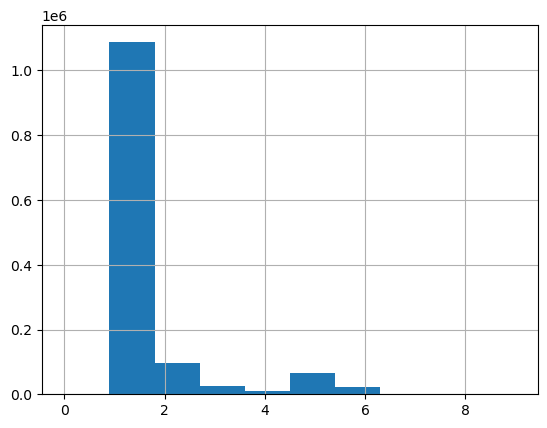

In [8]:
nyc_cab_df.Passenger_count.hist()

In [9]:
nyc_cab_df.columns

Index(['AWND', 'Base', 'Day', 'Dropoff_latitude', 'Dropoff_longitude',
       'Ehail_fee', 'Extra', 'Fare_amount', 'Lpep_dropoff_datetime', 'MTA_tax',
       'PRCP', 'Passenger_count', 'Payment_type', 'Pickup_latitude',
       'Pickup_longitude', 'RateCodeID', 'SNOW', 'SNWD', 'Store_and_fwd_flag',
       'TMAX', 'TMIN', 'Tip_amount', 'Tolls_amount', 'Total_amount',
       'Trip_distance', 'Trip_type', 'Type', 'VendorID',
       'lpep_pickup_datetime', 'Trip Length (min)'],
      dtype='object')

In [10]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=6)
fares = nyc_cab_sample['Fare_amount'].values
trip_lengths = nyc_cab_sample[['Trip Length (min)']].values


Text(0.5, 1.0, 'NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

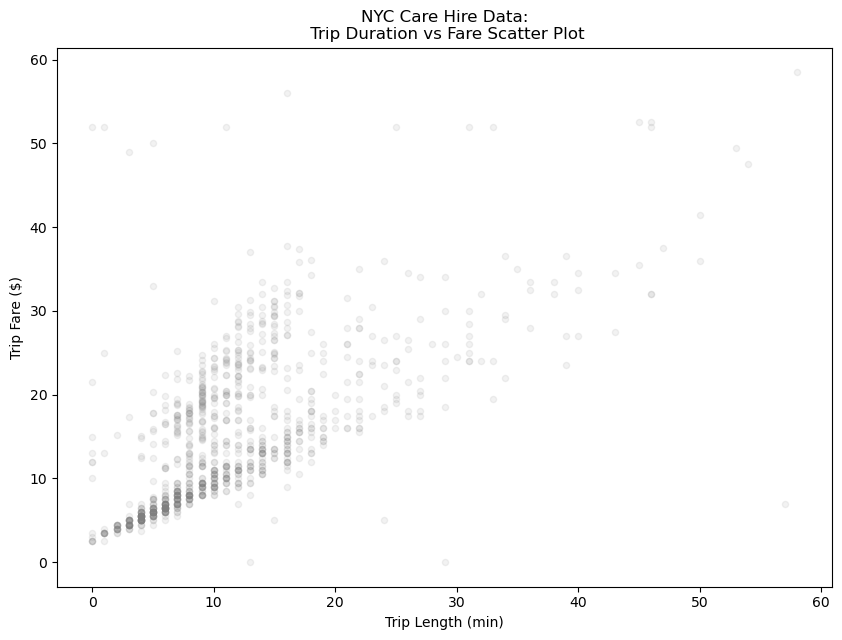

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))


ax.scatter(trip_lengths, fares, color='gray', alpha=0.1, s=20)

ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')



## Step #2: Modeling the Data

In [12]:
#nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=1)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample[['Trip Length (min)']].values
X.shape

(1000, 1)

In [15]:
regression = LinearRegression(fit_intercept=True)
regression.fit(X, y)



# this is the estimated statistical model (f_hat) using the predicted coefficients 
regression_line = lambda x: regression.intercept_ + regression.coef_ * x
print('The estimated equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0]))

The estimated equation of the regression line is: 6.585636707686248 + 0.7331691319407946 * x


In sklearn you can predict by using the `predict` method on the regression object as well, which will do the same thing as the `regression_line` function above.

In [17]:
regression.predict(X)

array([15.38366629,  8.7851441 , 15.38366629, 40.31141678, 13.1841589 ,
       11.71782063,  8.05197497, 13.1841589 , 15.38366629, 16.85000455,
       10.9846515 , 20.51585021, 11.71782063, 18.31634282, 10.25148237,
        8.7851441 , 18.31634282,  9.51831324, 18.31634282, 10.9846515 ,
       16.11683542, 17.58317369, 17.58317369, 14.65049716, 11.71782063,
       30.04704893, 15.38366629, 10.25148237, 13.91732803, 16.85000455,
       26.38120327, 22.71535761, 31.51338719, 15.38366629,  8.05197497,
       32.97972546, 13.91732803, 27.84754153, 18.31634282,  9.51831324,
       13.91732803, 15.38366629, 13.91732803, 13.1841589 , 13.91732803,
       19.04951195, 15.38366629, 10.25148237, 16.11683542, 17.58317369,
       16.85000455, 10.25148237, 10.9846515 , 12.45098976,  7.31880584,
       17.58317369, 12.45098976, 20.51585021, 13.91732803, 14.65049716,
       12.45098976, 13.91732803, 23.44852674, 10.9846515 , 25.64803414,
        9.51831324, 16.11683542, 10.9846515 , 14.65049716, 22.71

### Q1. Plot the regression line in red color along with the scatter plot

In [24]:
# your code here

## Step #3: Evaluate and Interpret the Model

### 1. Train vs Test Error

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

The train MSE is 48.59886786981504, the test MSE is 52.199666372395114


### Q2. Why is the MSE for test higher? 

*your answer here*

### 2. Uncertainty in the Model Parameter Estimates

Our sample of 1000 data points is but one possible sample from the population. In general you would only see that sample. But here we can sample multiple smaller datasets of 1000 points from the large data. So lets play. (If we didnt have multiple samples we would have to bootstrap the original sample)

In [21]:
def find_regression_params(datapoints):
    # randomly select number of samples from the big data
    nyc_cab_sample = nyc_cab_df.sample(n=datapoints)
    
    y = nyc_cab_sample['Fare_amount'].values
    X = nyc_cab_sample[['Trip Length (min)']].values
    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X, y)
    return regression_model.intercept_, regression_model.coef_[0]

In [22]:
import sys
replications = 500 # we take 5000 replications of 1000 points each
datapoints_in_sample = 1000
regression_params = []

for i in range(replications):
    if i % 10 == 0:
        out = (i / replications) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
        
    regression_params.append(find_regression_params(datapoints_in_sample))
    
sys.stdout.write("\r%d%%" % 100)
regression_params = np.array(regression_params)

100%

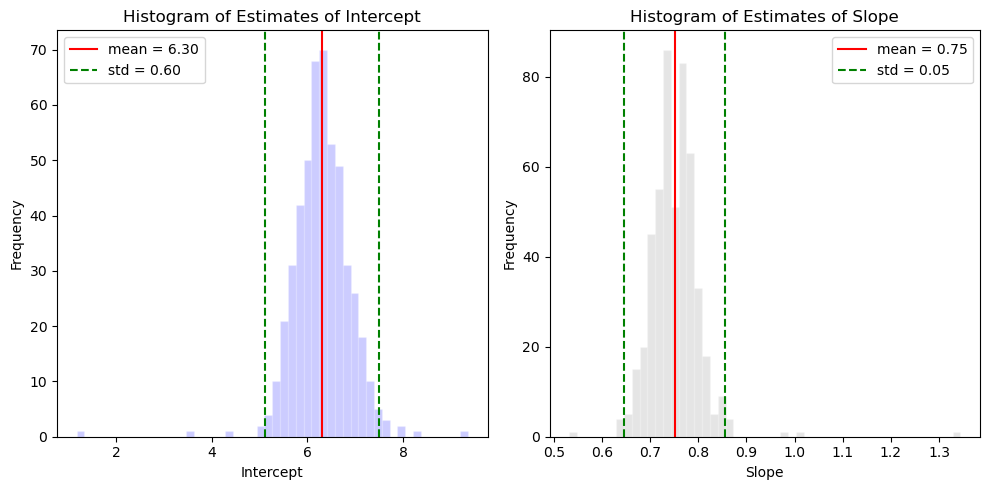

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(regression_params[:, 0], bins=50, color='blue', edgecolor='white', linewidth=1, alpha=0.2)
ax[0].axvline(x=regression_params[:, 0].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 0].mean()))
ax[0].axvline(x=regression_params[:, 0].mean() - 2 * regression_params[:, 0].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 0].std()))
ax[0].axvline(x=regression_params[:, 0].mean() + 2 * regression_params[:, 0].std(), color='green', linestyle='--')

ax[0].set_xlabel('Intercept')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Estimates of Intercept')
ax[0].legend(loc='best')


ax[1].hist(regression_params[:, 1], bins=50, color='gray', edgecolor='white', linewidth=1, alpha=0.2)
ax[1].axvline(x=regression_params[:, 1].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 1].mean()))
ax[1].axvline(x=regression_params[:, 1].mean() - 2 * regression_params[:, 1].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 1].std()))
ax[1].axvline(x=regression_params[:, 1].mean() + 2 * regression_params[:, 1].std(), color='green', linestyle='--')

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Estimates of Slope')
ax[1].legend(loc='best')

plt.tight_layout()


### Q3. What distributions are these? Why?

*your answer here*

### Q4 Use matplotlib to draw the 500 regression lines corresponding to the 500 replications (tip: create 500 calls to `ax.plot`). How does the visual width of the 500 lines in the y-direction compare to the y-width of the scatter-plot

In [ ]:
# your code here

*your answer here*

### Q5. The Effect of Sample Size on Uncertainty

What happens if you increase the number of datapoints in the sample? How do these histograms change?

*your answer here*

### Q6. Redo the scatter plot from the original sample. Now take the regression line fit from that original sample and use it to generate a new dataset. To do this, consider the prediction at each point `X`. Remember that this prediction is the center of a gaussian distribution on the y-direction with mean the prediction at that `X` and standard deviation $\sigma$. I provide the formula for the standard deviation below. Now use the `norm` object from `scipy.stats` to draw a random variable at each point in X, which will be the drawn `y` at that point (as opposed to the mean `y` given to us by the regression line). Plot this new dataset as a scatter plot along with the original dataset and the regression line. Is it the same dataset? Is it a new one?

In [ ]:
# your code here

*your answer here*